<a href="https://colab.research.google.com/github/UO294665/AAIM/blob/main/google_colab_files/Machine_Learning_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data description**¶

There are 77 expression levels of proteins/protein modifications (columns) that produce detectable signals in the nuclear cortex of Ts65Dn trisomic mice. These proteins are related to a functional hippocampus (learning and memory). In this data there are 38 control mice and 34 trisomic mice (Down syndrome), having 72 mice in total. 15 measurements were carried out for each protein per mouse/sample. In total 570 measurements accounted for control mice and 510 for trisomic mice, having 1080 independent measurements per protein. Some of the values are empty.

**Type of data**
This data set is multi-levelled as is describing 8 classes of mice in function of genotype, behaviour and treatment. According to genotype, we have control (c) and trisomic (t) mice. If we talk about behaviour, some mice have been stimulated to learn (CS) and others have not (SC). According to treatment, some mice have been treated with the drug memantine (m) to assess the ability of the drug in the learning process and others with saline solution (s). The aim is to identify subsets of proteins that are discriminant between the classes.

Classes:
c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)

t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

In [2]:
# Importing Libraries
import pandas as pd # data structure
import matplotlib.pyplot as plt # Plotting purpose
import numpy as np # Numerical computations
import seaborn as sns; sns.set(color_codes=True)  # for plot styling
from scipy.cluster.hierarchy import dendrogram, linkage # for dendrogram computation and plotting "linkage" function will be used agglomerative clustering
from sklearn.decomposition import PCA  # Principal component analysis
from sklearn.cluster import KMeans, AgglomerativeClustering  # CLustering methods
from sklearn import preprocessing #for normalization of features

In [4]:
!pip install xlrd # for reading and formatting data from excel (xls) files

In [5]:
# Reading data
data = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls", header = 0)
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [6]:
# Data Cleaning
data = data.dropna()  # Dropping null, and NaNs (Not a number)
data = data.drop(['Behavior','Genotype','MouseID','Treatment'], axis=1) # Dropping irrelevant fields from the dataset
data.head() # Printing first 5 columns to see the data in the dataframe

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
75,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,c-CS-m
76,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,c-CS-m
77,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,c-CS-m
78,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,c-CS-m
79,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0.133358,0.112851,0.128635,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,c-CS-m


In [ ]:
import numpy as np
x = data.iloc[:,0:76]
y = data.iloc[:,-1]

X = np.array(x)

In [7]:
# load dataset, and split data for classification
from sklearn.datasets import load_iris  # use only 2 features (1:3)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # performance metric for classification
iris=load_iris()
x = data.iloc[:,0:77]
y = data.iloc[:,-1]
x = np.array(x)
pair=[1,3]
X_train, X_test, Y_train, Y_test=train_test_split(x,y, test_size=0.3)

**k-NN**

In [8]:
# Apply k-Nearest Neighbour, and plot the confusion matrix, Choose the best results based on the value of k
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(4)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

[[14  3  0  0  3  0  0  3]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  1  0]
 [ 0  0  0 21  0  0  0  0]
 [ 1  0  0  0 28  0  0  0]
 [ 0  1  0  0  1 23  0  0]
 [ 0  0  1  0  0  0 13  0]
 [ 0  0  0  0  0  0  0 21]]


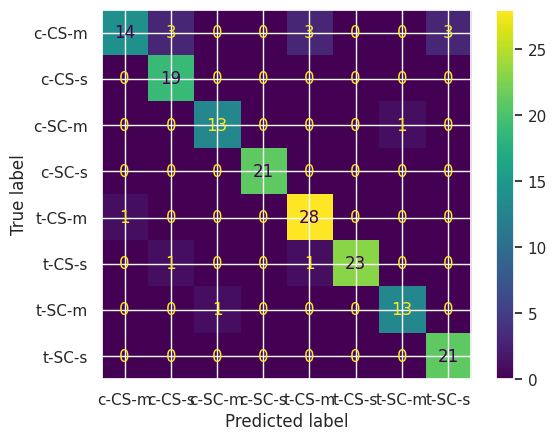

0.9156626506024096

In [12]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))

# Get the unique class labels from the target variable
unique_labels = np.unique(Y_test)

# Use the unique labels as display_labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = unique_labels)

cm_display.plot()
plt.show()
accuracy_score(model.predict(X_test), Y_test)

**Decision Trees**

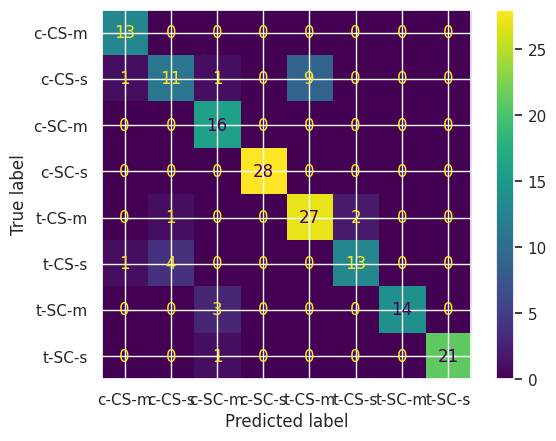

0.8614457831325302

In [ ]:
# Apply Decision Trees, and plot the confusion matrix, tune decision trees for best results
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))

# Get unique class labels from Y_test
unique_labels = np.unique(Y_test)

# Use unique_labels as display_labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = unique_labels)

cm_display.plot()
plt.show()

accuracy_score(model.predict(X_test), Y_test)

**Random Forests**

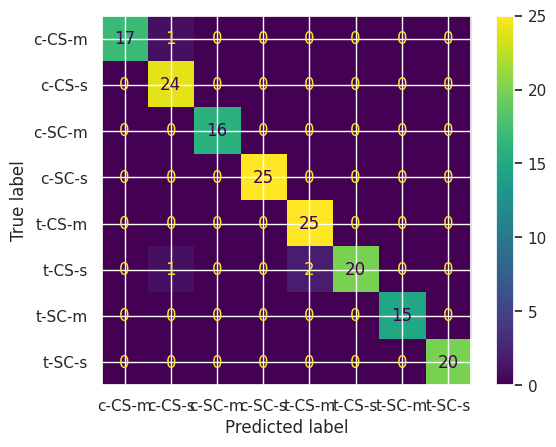

0.9759036144578314

In [ ]:
# Apply Random Forests, and plot the confusion matrix, tune decision trees for best results
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = RandomForestClassifier()
model.fit(X_train, Y_train)

confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))

# Get unique class labels from Y_test
unique_labels = np.unique(Y_test)

# Use unique_labels as display_labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = unique_labels)

cm_display.plot()
plt.show()

accuracy_score(model.predict(X_test), Y_test)

**Support Vector Machines**

['c-CS-m' 'c-CS-s' 'c-SC-m' 'c-SC-s' 't-CS-m' 't-CS-s' 't-SC-m' 't-SC-s']


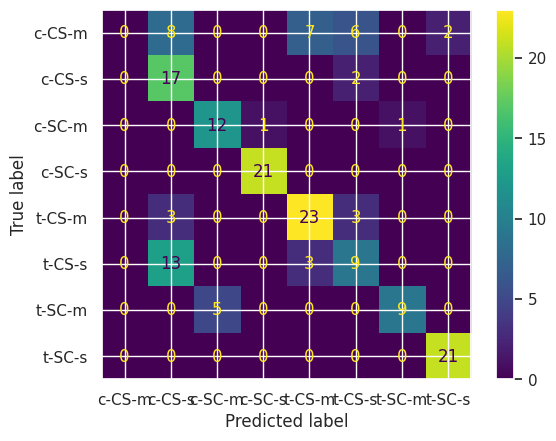

0.6746987951807228

In [20]:
# Apply Support Vector Machines (With and without kernel functions), and plot confusion matrix, tune it for best results
from sklearn import svm
model=svm.SVC()  # when no kernel is specified, we are using linear SVM
model.fit(X_train, Y_train)

confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))

# Get unique class labels from Y_test
unique_labels = np.unique(Y_test)

# Use unique_labels as display_labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = unique_labels)

cm_display.plot()
plt.show()

accuracy_score(model.predict(X_test), Y_test)

**Analysis**

In [38]:
# Prepare a table showing comparions of True Postives, True Negatives, False Positives, and False Negatives. Comment, which machine learning method achieved the best results.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, svm
import numpy as np


def compute_confusion_metrics(conf_matrix):
    unique_labels = np.unique(Y_test)
    num_classes = conf_matrix.shape[0]
    TP = np.diag(conf_matrix)  # True Positive
    FP = np.sum(conf_matrix, axis=0) - TP  # False Positive
    FN = np.sum(conf_matrix, axis=1) - TP  # False Negative
    TN = np.sum(conf_matrix) - (TP + FP + FN)  # True Negative

    metrics = []
    for i in range(num_classes):
        metrics.append({
            'Clase': unique_labels[i],
            'TP': TP[i],
            'FP': FP[i],
            'FN': FN[i],
            'TN': TN[i]
        })

    return metrics

def printing(results):

  print("Accuracy Prediction: "+str(accuracy_score(model.predict(X_test), Y_test))+"\n")
  # Imprimir resultados
  print("|   Class    | TP | FP | FN | TN  |")
  print("|------------|----|----|----|-----|")
  for res in results:
      print(f"|  {res['Clase']}    | {res['TP']:2} | {res['FP']:2} | {res['FN']:2} | {res['TN']:3} |")
  print("\n\n")


#KNeighbors

model=KNeighborsClassifier(4)
model.fit(X_train,Y_train)
confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))

results = compute_confusion_metrics(confusion_matrix)


printing(results)

#Decision Tree

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))

results = compute_confusion_metrics(confusion_matrix)

printing(results)

#Random Forest

model = RandomForestClassifier()
model.fit(X_train, Y_train)

confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))

results = compute_confusion_metrics(confusion_matrix)

printing(results)

#Support Vector Machines

model=svm.SVC()
model.fit(X_train, Y_train)

confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))

results = compute_confusion_metrics(confusion_matrix)

printing(results)

Accuracy Prediction: 0.9156626506024096

|   Class    | TP | FP | FN | TN  |
|------------|----|----|----|-----|
|  c-CS-m    | 14 |  1 |  9 | 142 |
|  c-CS-s    | 19 |  4 |  0 | 143 |
|  c-SC-m    | 13 |  1 |  1 | 151 |
|  c-SC-s    | 21 |  0 |  0 | 145 |
|  t-CS-m    | 28 |  4 |  1 | 133 |
|  t-CS-s    | 23 |  0 |  2 | 141 |
|  t-SC-m    | 13 |  1 |  1 | 151 |
|  t-SC-s    | 21 |  3 |  0 | 142 |



Accuracy Prediction: 0.8132530120481928

|   Class    | TP | FP | FN | TN  |
|------------|----|----|----|-----|
|  c-CS-m    | 12 |  2 | 11 | 141 |
|  c-CS-s    | 18 |  6 |  1 | 141 |
|  c-SC-m    | 10 |  5 |  4 | 147 |
|  c-SC-s    | 19 |  1 |  2 | 144 |
|  t-CS-m    | 25 |  9 |  4 | 128 |
|  t-CS-s    | 21 |  4 |  4 | 137 |
|  t-SC-m    |  9 |  4 |  5 | 148 |
|  t-SC-s    | 21 |  0 |  0 | 145 |



Accuracy Prediction: 0.9698795180722891

|   Class    | TP | FP | FN | TN  |
|------------|----|----|----|-----|
|  c-CS-m    | 20 |  0 |  3 | 143 |
|  c-CS-s    | 19 |  2 |  0 | 145 |
|  c-SC

We achieve the best accuracy with Random Forest method